In [5]:
from keras.datasets import cifar10
from keras import models
from keras import layers
from keras.utils import to_categorical
from keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [0]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

train_hot_class = to_categorical(train_labels,10)
test_hot_class = to_categorical(test_labels,10)

In [28]:
model_fit = models.Sequential()
model_fit.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=train_images.shape[1:], padding='same'))
model_fit.add(layers.Conv2D(32, (3,3), activation='relu'))
model_fit.add(layers.MaxPooling2D(pool_size=(2,2)))
model_fit.add(layers.Dropout(.5))
model_fit.add(layers.Conv2D(64,(3,3), activation='relu'))
model_fit.add(layers.Conv2D(64, (3,3), activation='relu'))
model_fit.add(layers.MaxPooling2D(pool_size=(2,2)))
model_fit.add(layers.Dropout(.5))

model_fit.add(Flatten())
model_fit.add(Dense(512))
model_fit.add(Activation('relu'))
model_fit.add(Dense(256))
model_fit.add(Activation('relu'))
model_fit.add(Dense(10, activation='softmax'))


model_fit.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

fit_epochs = 20
history_fit = model_fit.fit(train_images, train_labels, batch_size=200, epochs=epochs, validation_data=(test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 128s 3ms/step - loss: 1.7078 - acc: 0.3716 - val_loss: 1.3539 - val_acc: 0.5080
Epoch 2/20
50000/50000 [==============================] - 123s 2ms/step - loss: 1.3177 - acc: 0.5228 - val_loss: 1.1557 - val_acc: 0.5854
Epoch 3/20
50000/50000 [==============================] - 124s 2ms/step - loss: 1.1650 - acc: 0.5833 - val_loss: 1.0376 - val_acc: 0.6293
Epoch 4/20
50000/50000 [==============================] - 125s 3ms/step - loss: 1.0593 - acc: 0.6243 - val_loss: 0.9336 - val_acc: 0.6700
Epoch 5/20
50000/50000 [==============================] - 126s 3ms/step - loss: 0.9888 - acc: 0.6501 - val_loss: 0.9429 - val_acc: 0.6701
Epoch 6/20
50000/50000 [==============================] - 124s 2ms/step - loss: 0.9229 - acc: 0.6734 - val_loss: 0.8670 - val_acc: 0.6942
Epoch 7/20
50000/50000 [==============================] - 124s 2ms/step - loss: 0.8649 - acc: 0.6944 - val_loss: 0.8368 - 

In [36]:
model_underfit = models.Sequential()
model_underfit.add(layers.Conv2D(32,(2,2), activation='relu',input_shape=train_images.shape[1:], padding='same'))
model_underfit.add(layers.MaxPooling2D(pool_size=(20,20)))

model_underfit.add(Flatten())
model_underfit.add(Dense(10, activation='softmax'))

model_underfit.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

under_epochs = 10
history_underfit = model_underfit.fit(train_images[:100], train_labels[:100], batch_size=50, epochs=under_epochs, validation_data=(test_images,test_labels))

Train on 100 samples, validate on 10000 samples
Epoch 1/10
100/100 [==============================] - 2s 22ms/step - loss: 2.3095 - acc: 0.1300 - val_loss: 2.3563 - val_acc: 0.1007
Epoch 2/10
100/100 [==============================] - 1s 13ms/step - loss: 2.2999 - acc: 0.1300 - val_loss: 2.3519 - val_acc: 0.1007
Epoch 3/10
100/100 [==============================] - 1s 13ms/step - loss: 2.2922 - acc: 0.1300 - val_loss: 2.3480 - val_acc: 0.1009
Epoch 4/10
100/100 [==============================] - 1s 13ms/step - loss: 2.2855 - acc: 0.1300 - val_loss: 2.3447 - val_acc: 0.1007
Epoch 5/10
100/100 [==============================] - 1s 13ms/step - loss: 2.2795 - acc: 0.1300 - val_loss: 2.3415 - val_acc: 0.1010
Epoch 6/10
100/100 [==============================] - 1s 13ms/step - loss: 2.2723 - acc: 0.1300 - val_loss: 2.3393 - val_acc: 0.1009
Epoch 7/10
100/100 [==============================] - 1s 13ms/step - loss: 2.2670 - acc: 0.1300 - val_loss: 2.3375 - val_acc: 0.1012
Epoch 8/10
100/100 [=

In [49]:
model_overfit = models.Sequential()
model_overfit.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=train_images.shape[1:], padding='same'))
model_overfit.add(layers.MaxPooling2D(pool_size=(2,2)))

model_overfit.add(Flatten())
model_overfit.add(Dense(100))
model_overfit.add(Activation('relu'))
model_overfit.add(Dense(10, activation='softmax'))

model_overfit.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

over_epochs = 20
history_overfit = model_overfit.fit(train_images[:500], train_labels[:500], epochs=over_epochs, validation_data=(test_images,test_labels))

Train on 500 samples, validate on 10000 samples
Epoch 1/20
500/500 [==============================] - 5s 10ms/step - loss: 2.2974 - acc: 0.1440 - val_loss: 2.1849 - val_acc: 0.1704
Epoch 2/20
500/500 [==============================] - 4s 7ms/step - loss: 2.0194 - acc: 0.2760 - val_loss: 2.0666 - val_acc: 0.2543
Epoch 3/20
500/500 [==============================] - 4s 7ms/step - loss: 1.8554 - acc: 0.3320 - val_loss: 2.1028 - val_acc: 0.2261
Epoch 4/20
500/500 [==============================] - 4s 7ms/step - loss: 1.7484 - acc: 0.3900 - val_loss: 1.9604 - val_acc: 0.2882
Epoch 5/20
500/500 [==============================] - 4s 7ms/step - loss: 1.5933 - acc: 0.5040 - val_loss: 1.9246 - val_acc: 0.2964
Epoch 6/20
500/500 [==============================] - 4s 7ms/step - loss: 1.5178 - acc: 0.4720 - val_loss: 1.8704 - val_acc: 0.3298
Epoch 7/20
500/500 [==============================] - 4s 7ms/step - loss: 1.3524 - acc: 0.5680 - val_loss: 1.8959 - val_acc: 0.3169
Epoch 8/20
500/500 [=======

In [25]:
model_fit.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)         

In [15]:
model_underfit.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14402     
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [16]:
model_overfit.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 5000)              36005000  
_________________________________________________________________
activation_4 (Activation)    (None, 5000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [50]:
test_fit_loss, test_fit_acc = model_fit.evaluate(test_images, test_labels)
test_under_loss, test_under_acc = model_underfit.evaluate(test_images, test_labels)
test_over_loss, test_over_acc = model_overfit.evaluate(test_images, test_labels)

print('Fit Model: Test accuracy:', test_fit_acc*100)
print('Underfit Model: Test accuracy:', test_under_acc*100)
print('Overfit Model: Test accuracy:', test_over_acc*100,'\n\n')
print('Fit Model: Test loss:', test_fit_loss)
print('Underfit Model: Test loss:', test_under_loss)
print('Overfit Model: Test loss:', test_over_loss)

10000/10000 [==============================] - 3s 325us/step
Fit Model: Test accuracy: 78.57
Underfit Model: Test accuracy: 10.79
Overfit Model: Test accuracy: 36.51 


Fit Model: Test loss: 0.638023579454422
Underfit Model: Test loss: 2.3350405181884764
Overfit Model: Test loss: 1.994646323776245


In [0]:
history_fit_dict = history_fit.history
loss_fit_values = history_fit_dict['loss']
test_fit_loss_values = history_fit_dict['val_loss']
epochs_fit_range = range(1, fit_epochs+1)

history_under_dict = history_underfit.history
loss_under_values = history_under_dict['loss']
test_under_loss_values = history_under_dict['val_loss']
epochs_under_range = range(1, under_epochs+1)

history_over_dict = history_overfit.history
loss_over_values = history_over_dict['loss']
test_over_loss_values = history_over_dict['val_loss']
epochs_over_range = range(1, over_epochs+1)

modelHistory = [[history_fit_dict, loss_fit_values, test_fit_loss_values, epochs_fit_range],
                [history_under_dict, loss_under_values, test_under_loss_values, epochs_under_range],
                [history_over_dict, loss_over_values, test_over_loss_values, epochs_over_range]]

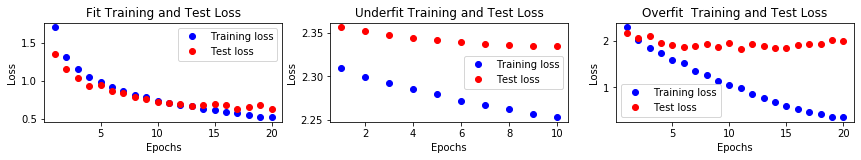

In [55]:
fig = plt.figure()
fig.subplots_adjust(right=2)
for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(modelHistory[i-1][3], modelHistory[i-1][1], 'bo', label='Training loss')
    plt.plot(modelHistory[i-1][3], modelHistory[i-1][2], 'ro', label='Test loss')
    if(i==1):
      plt.title('Fit Training and Test Loss')
    elif(i==2):
      plt.title('Underfit Training and Test Loss')
    else:
      plt.title('Overfit  Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

In [0]:
acc_fit_values = history_fit_dict['acc']
test_acc_fit_values = history_fit_dict['val_acc']

acc_under_values = history_under_dict['acc']
test_acc_under_values = history_under_dict['val_acc']

acc_over_values = history_over_dict['acc']
test_acc_over_values = history_over_dict['val_acc']

accHistory = [[acc_fit_values, test_acc_fit_values],
              [acc_under_values, test_acc_under_values],
              [acc_over_values, test_acc_over_values]]

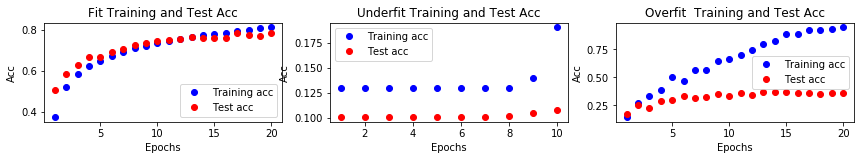

In [54]:
fig = plt.figure()
fig.subplots_adjust(right=2)
for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.plot(modelHistory[i-1][3], accHistory[i-1][0], 'bo', label='Training acc')
    plt.plot(modelHistory[i-1][3], accHistory[i-1][1], 'ro', label='Test acc')
    if(i==1):
      plt.title('Fit Training and Test Acc')
    elif(i==2):
      plt.title('Underfit Training and Test Acc')
    else:
      plt.title('Overfit  Training and Test Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()